In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv("car data (2).csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


HANDLING MISSING VALUES

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# df[df.duplicated()]


In [8]:
# df.drop_duplicates(inplace=True)

In [9]:
# df[df.duplicated()]

In [10]:
#ploting histogram

In [11]:
cols=df.select_dtypes(include=np.number)
cols.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

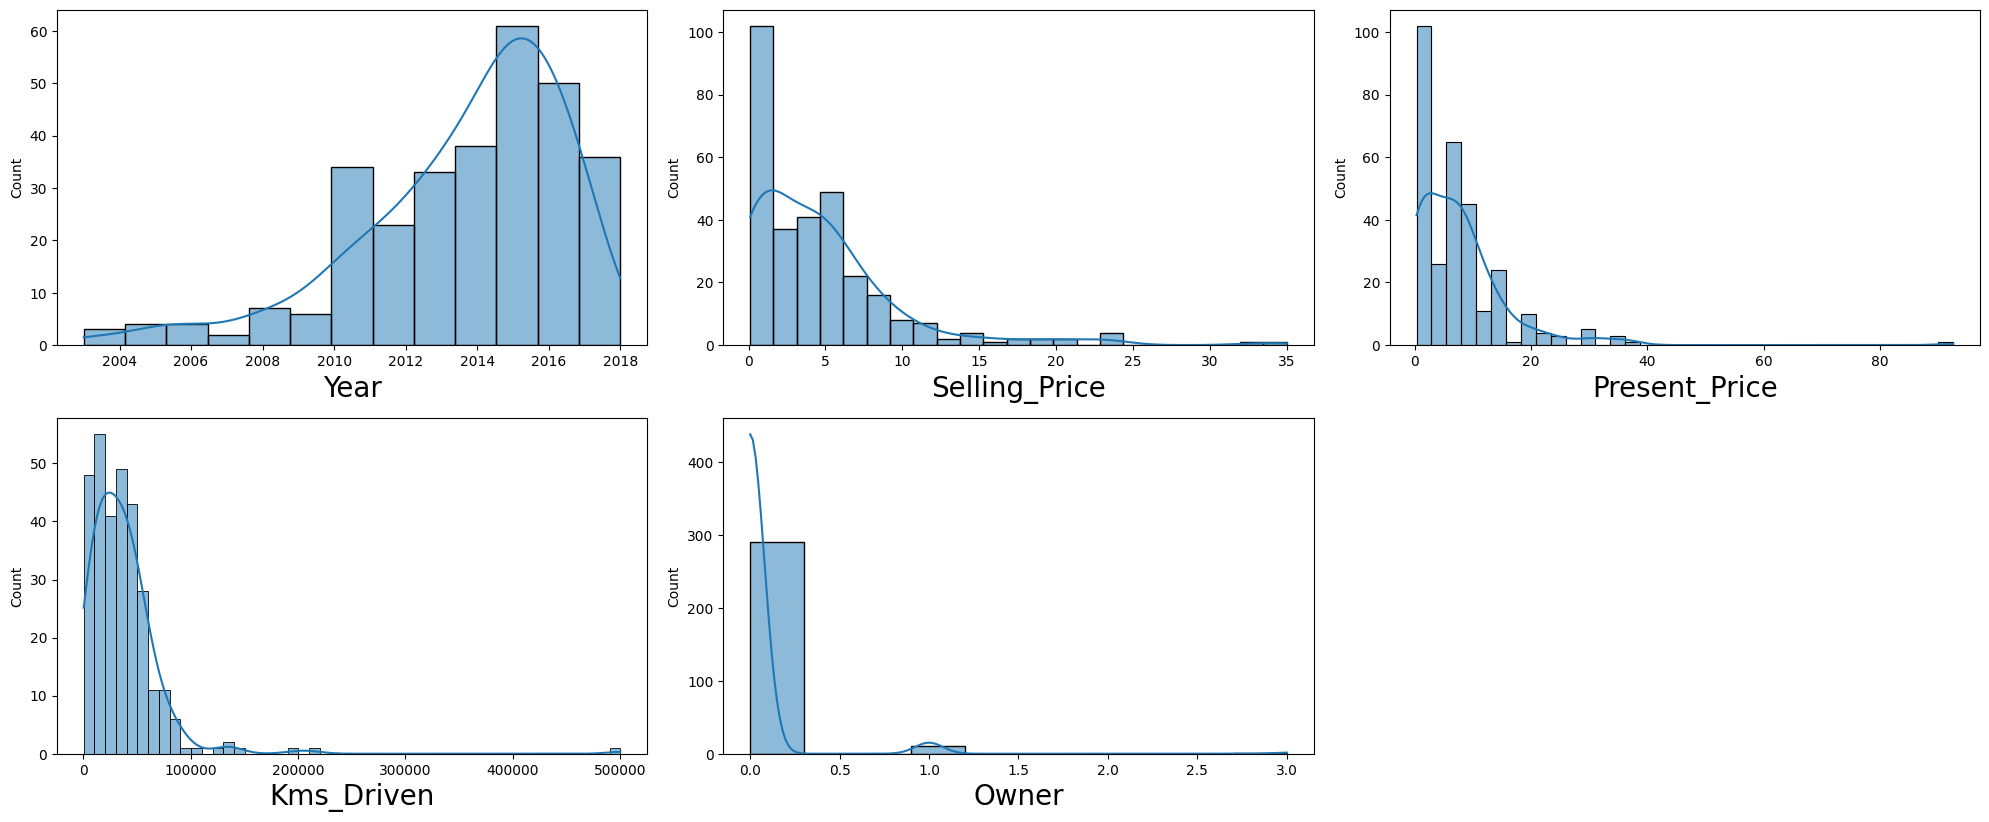

In [12]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in cols:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(cols[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
    


Handling Outliers

In [13]:
outlier_cols=df.select_dtypes(include=np.number)
outlier_cols.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [14]:
outlier_cols=['Year','Selling_Price', 'Present_Price', 'Kms_Driven']

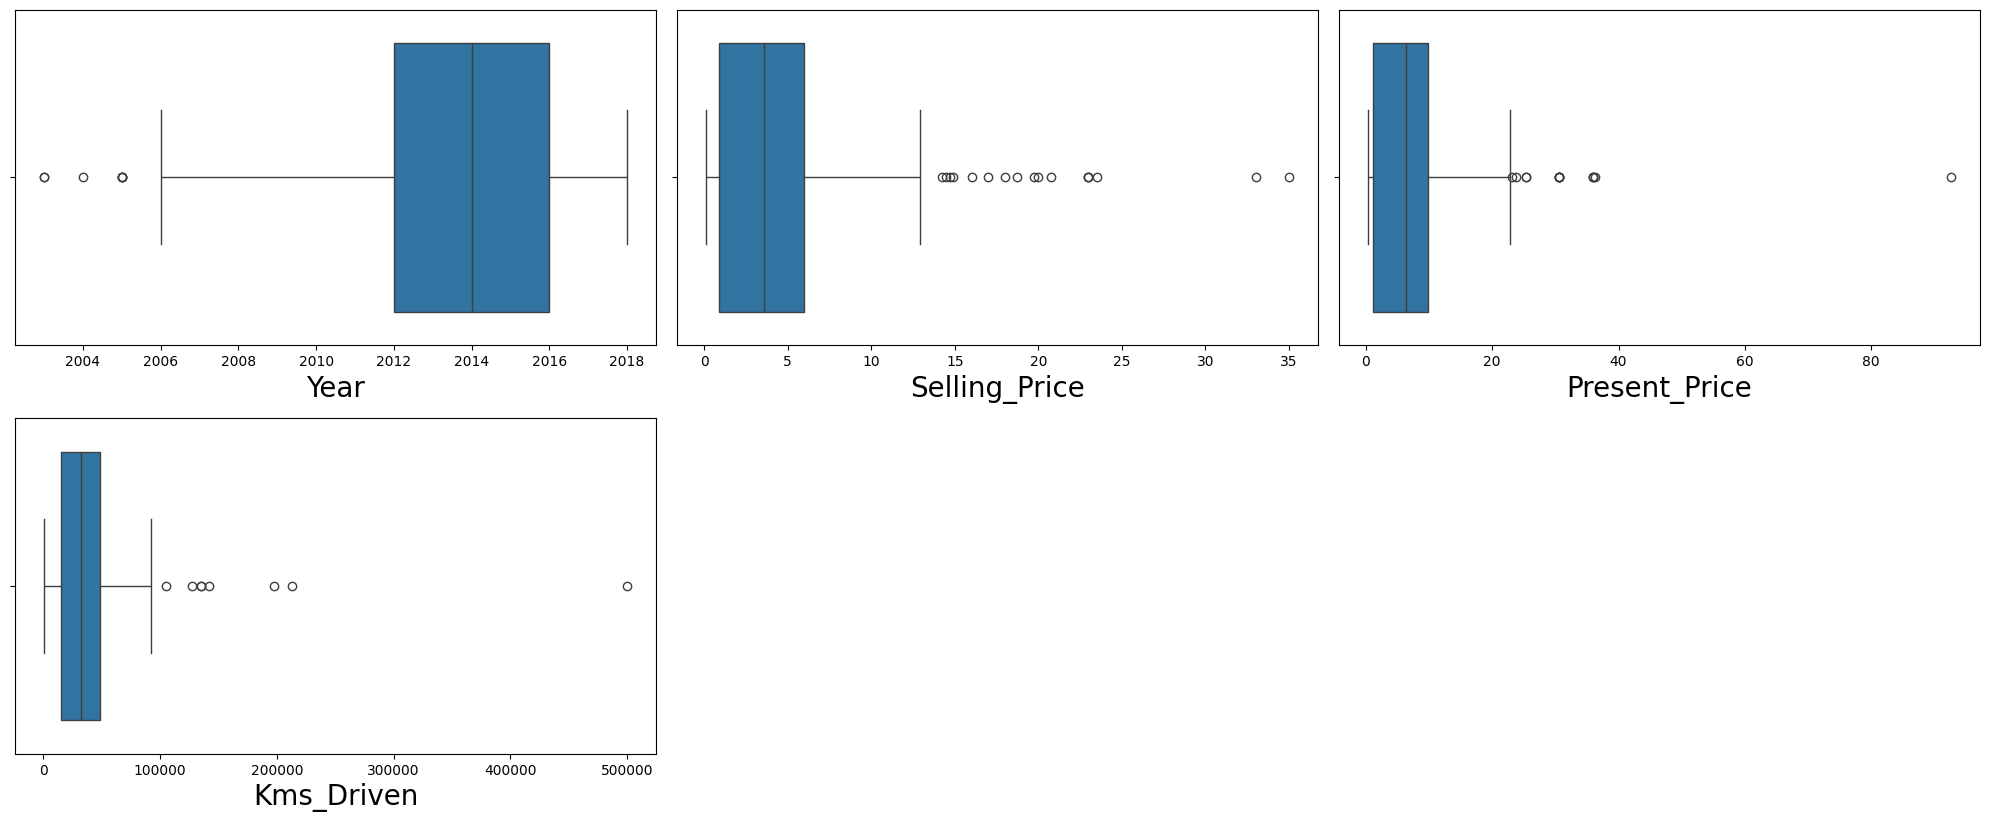

In [15]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in outlier_cols:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(x=column,data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

In [16]:
def remove_outliers_iqr(data,column):
    q1,q2,q3=np.percentile(data[column],[25,50,75])
    print("q1,q2,q3 is :",q1,q2,q3)
    IQR=q3-q1
    print("IQR is:", IQR)

    lower_limit=q1-(1.5*IQR)
    upper_limit=q3+(1.5*IQR)
    data[column]=np.where(data[column]>upper_limit,upper_limit,data[column]) #capping the upper limit
    data[column]=np.where(data[column]<lower_limit,lower_limit,data[column]) #flooring the lower limit

In [17]:
for column in outlier_cols:
    remove_outliers_iqr(df,column)

q1,q2,q3 is : 2012.0 2014.0 2016.0
IQR is: 4.0
q1,q2,q3 is : 0.9 3.6 6.0
IQR is: 5.1
q1,q2,q3 is : 1.2 6.4 9.9
IQR is: 8.700000000000001
q1,q2,q3 is : 15000.0 32000.0 48767.0
IQR is: 33767.0


FEATURE ENGINEERING

In [18]:
df.drop(columns=["Car_Name"],inplace=True)

In [19]:
from datetime import datetime

In [20]:
current_year=datetime.now().year
current_year

2025

In [21]:
#convert "Year" into "car Age"

current_year=datetime.now().year
df["Car_Age"]=current_year-df["Year"]
df.drop(columns=["Year"], inplace=True)

In [22]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0,11.0
1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0,12.0
2,7.25,9.85,6900.0,Petrol,Dealer,Manual,0,8.0
3,2.85,4.15,5200.0,Petrol,Dealer,Manual,0,14.0
4,4.60,6.87,42450.0,Diesel,Dealer,Manual,0,11.0


Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

In [24]:
categorical_col=df.select_dtypes(include="object")
categorical_col.columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [25]:
for col in categorical_col:
    print(f"{col}={df[col].unique()}")



Fuel_Type=['Petrol' 'Diesel' 'CNG']
Seller_Type=['Dealer' 'Individual']
Transmission=['Manual' 'Automatic']


In [ ]:
le=LabelEncoder()

df["Fuel_Type"]=le.fit_transform(df["Fuel_Type"])  #label Encoder
df["Transmission"]=le.fit_transform(df["Transmission"])

df=pd.get_dummies(df,columns=["Seller_Type"],drop_first=True)#,dtype="int")  #one_hot



Feature Selection

<Axes: >

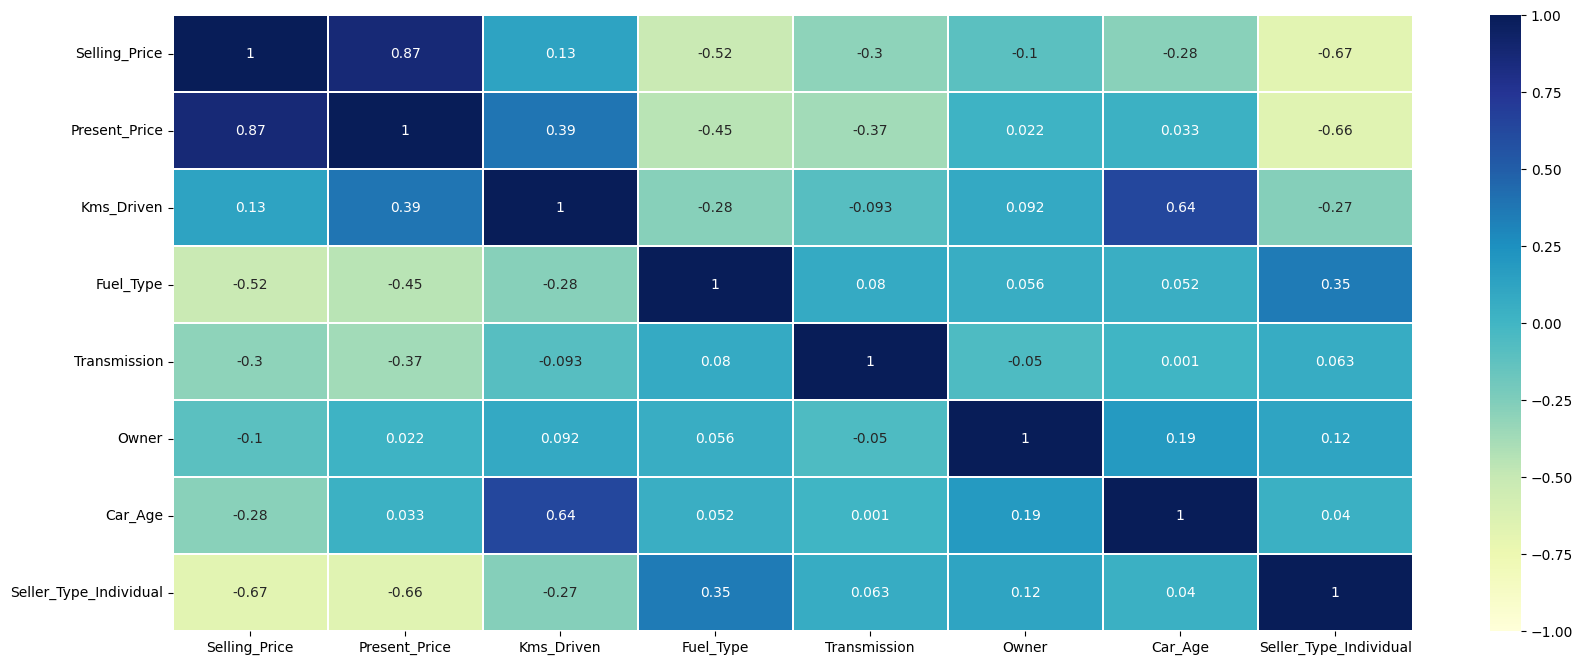

In [27]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=0.2,cmap="YlGnBu")

In [28]:
#spliting data into dependent and independent columns

In [29]:
x=df.drop("Selling_Price",axis=1)
y=df["Selling_Price"]

In [30]:
x

,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,Car_Age,Seller_Type_Individual
0,5.59,27000.0,2,1,0,11.0,False
1,9.54,43000.0,1,1,0,12.0,False
2,9.85,6900.0,2,1,0,8.0,False
3,4.15,5200.0,2,1,0,14.0,False
4,6.87,42450.0,1,1,0,11.0,False
...,...,...,...,...,...,...,...
296,11.60,33988.0,1,1,0,9.0,False
297,5.90,60000.0,2,1,0,10.0,False
298,11.00,87934.0,2,1,0,16.0,False
299,12.50,9000.0,1,1,0,8.0,False


In [31]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Scaling

In [32]:
normalisation=MinMaxScaler()
x=normalisation.fit_transform(x)

x=pd.DataFrame(x)


x


,0,1,2,3,4,5,6
0,0.232877,0.267900,1.0,1.0,0.0,0.333333,0.0
1,0.407424,0.429651,0.5,1.0,0.0,0.416667,0.0
2,0.421122,0.064700,1.0,1.0,0.0,0.083333,0.0
3,0.169244,0.047514,1.0,1.0,0.0,0.583333,0.0
4,0.289439,0.424091,0.5,1.0,0.0,0.333333,0.0
...,...,...,...,...,...,...,...
296,0.498453,0.338545,0.5,1.0,0.0,0.166667,0.0
297,0.246575,0.601511,1.0,1.0,0.0,0.250000,0.0
298,0.471940,0.883908,1.0,1.0,0.0,0.750000,0.0
299,0.538224,0.085930,0.5,1.0,0.0,0.083333,0.0


In [33]:
x.describe()

,0,1,2,3,4,5,6
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.298567,0.342979,0.893688,0.867110,0.014396,0.361019,0.352159
std,0.272315,0.239861,0.212901,0.340021,0.082638,0.230678,0.478439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.038886,0.146587,1.000000,1.000000,0.000000,0.166667,0.000000
50%,0.268670,0.318447,1.000000,1.000000,0.000000,0.333333,0.000000
75%,0.423332,0.487952,1.000000,1.000000,0.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


train test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
#Train a Baseline Model(linear Regression)


lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred=lr_model.predict(x_test)
y_pred

array([ 0.85460238,  8.83260985,  5.83722796, -1.44548979, 10.14351315,
        6.7145395 ,  1.36414312,  0.94895286,  1.33023179,  6.90151699,
        8.5481894 ,  0.66772494,  6.99035279,  1.38130742,  6.31069228,
        2.87322084,  0.73473038, 11.74010075,  1.69913522,  2.43090694,
        0.51873332,  7.5194148 ,  6.13869008,  2.78911987,  0.81994031,
        3.85460632,  5.51577105,  2.90611936,  2.14769537,  1.77667804,
        0.50426082,  8.77270887, -0.46261215,  2.54749911,  7.972238  ,
        4.58197259,  7.78899584,  8.66355361,  2.71156883,  9.06861252,
        5.08548316,  3.7484277 ,  4.44998243,  0.5429029 ,  6.65365659,
        0.54080046,  7.89498277, 10.54958187,  3.10131024,  4.5907007 ,
        5.10184481,  2.22284851, 13.44339325, 14.41210542,  6.75245023,
        8.23522236,  4.56078666,  8.48384324,  2.23918441,  5.80296205,
        0.24611707, -2.18585025,  1.96395971, -1.41649866,  4.77908265,
        1.8779714 , 13.19865588, 13.51963557,  5.64023275, -0.75

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [40]:
#evaluation
mae=mean_absolute_error(y_test,y_pred)
msr=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [41]:
mae,msr,r2

(1.0292563658001561, 2.0234164098663863, 0.8640790135680989)

polynomial regression

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
#apply polynomial transformation (degree 2)
poly=PolynomialFeatures(degree=2, include_bias=False)
X_train_poly=poly.fit_transform(x_train)
X_test_poly=poly.transform(x_test)


In [44]:
#Fit polynimial regression model
poly_model=LinearRegression()
poly_model.fit(X_train_poly,y_train)

#predict and evaluate
y_pred_poly=poly_model.predict(X_test_poly)

#performance
print("Polynomial Regression (Degree 2): ")
print("MSE:",mean_squared_error(y_test,y_pred_poly))
print("R^2 score:",r2_score(y_test,y_pred_poly))



Polynomial Regression (Degree 2): 
MSE: 1.039689261867702
R^2 score: 0.9301599070924581


check over and underfitting

In [45]:
#predict on both training and test sets 

y_pred_train=lr_model.predict(x_train)
y_pred_test=lr_model.predict(x_test)

In [46]:
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)

In [47]:
r2_train                     #90                70

0.8903177955567082

In [48]:
r2_test                     #70(overfitting)    68(underfitting)

0.8640790135680989

In [49]:
#its generalized( no overfitting or underfitting)

REGULARIZATION TECHINIQUE (to avoid overfitting)

In [50]:
from sklearn.linear_model import Ridge,Lasso
ridge=Ridge(alpha=1.0)
ridge.fit(x_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [51]:
#prediction
y_train_pred_ridge=ridge.predict(x_train)
y_test_pred_ridge=ridge.predict(x_test)

In [52]:
#evaluation

from sklearn.metrics import mean_squared_error

mse_train_ridge=mean_squared_error(y_train,y_train_pred_ridge)
mse_test_ridge=mean_squared_error(y_test,y_test_pred_ridge)


In [53]:
mse_train_ridge

1.584175576353143

In [54]:
mse_test_ridge

1.8080722813153949

In [55]:
r2_score(y_train,y_train_pred_ridge)

0.8833104338811989

In [56]:
r2_score(y_test,y_test_pred_ridge)

0.8785445413913617

In [57]:
#we can use lasso(no.of feature is high) instead of ridge(high correlation)

In [58]:
#SVM
from sklearn.svm import SVR
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
accuracy=r2_score(y_test,y_pred)
accuracy

0.8680693921384043

In [59]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="squared_error", max_depth=4)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
accuracy=r2_score(y_test,y_pred)
accuracy

0.885153406565288

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_estimators=100)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy=r2_score(y_test, y_pred)
accuracy

0.9434544096317583

In [61]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=100)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
accuracy=r2_score(y_test, y_pred)
accuracy

0.9104857917742828

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gra=GradientBoostingRegressor(n_estimators=100)
gra.fit(x_train, y_train)
y_pred = gra.predict(x_test)
accuracy=r2_score(y_test, y_pred)
accuracy

0.9556147720996183